# Background: clustering documents by similarity

***Picture yourself reading an awesome article online about metagenomics. After finishing the article, you try to find other articles on the same topic. How can you retrieve similar articles? How do recommendation systems work?***

This assignment will focus on understanding key concepts of document retrieval and clustering. Then, next in the assignment will explore how some bioinformatic tools that apply these concepts to metagenomics.

# Exercise 1: Word counts and bag of words model

So you want to retrieve other articles about metagenomics. But how do we do this? There are many articles out there and you don't want to go and read everything posted on the internet.

So we need a way to automatically retrieve a document that might be of interest. To achieve this, first we need to decide how to measure similarity between articles? Next, we need to find a second article is similar to the one you're reading now.

The bag of word model is a very popular method where we simply ignore the order of words that are present in the document. This model doesn't take into account the structure of the document (the order of the words),but instead simply counts the number of instances of every word in the document.

So let's look at a specific example of this, by taking two very short documents :

Document 1: *Metagenomics uses the genetic material directly from the environment.*

Document 2: *We extracted the genetic material from the soil samples.*

In order to assess how similar these two documents are, we can use word counts.

In [4]:
# Look at the word dictionary for the document 1:

document1 ={
    "metagenomics": 1,
    "uses": 1,
    "the": 2,
    "genetic":1,
    "material":1,
    "directly":1,
    "from":1,
    "environment":1
}

#create a similar dictionary for the document 2:

document2 ={
    "we": 1,
    "extracted": 1,
    "the": 2,
    "genetic": 1,
    "material": 1,
    "from": 1,
    "soil": 1,
    "samples": 1
    # fill the dictionary
}

We can then use these words counts to calulate a simple euclidean distance between the documents. This is easily calculated as an element-wise product over this vector.

For example, the distance between the sentences "It is a pretty cake" and "the cake is a lie" is :

![alt text](data/img/cake.png "Title")

In [3]:
# calculate the distance for the Document 1 and 2.

# create a unique list of words
bow = {}
for word in document1.keys():
    if bow[word]:
       bow[word] += 1
    else:
        bow[word] = 1

for word in document2.keys():
    if bow[word]:
       bow[word] += 1
    else:
        bow[word] = 1
    
for word in 


Now consider the following documents :
    
Document 3: *Metagenomics uses the genetic material directly from the environment. Metagenomics uses the genetic material directly from the environment.*

Document 4: *We extracted the genetic material from the samples. We extracted the genetic material from the samples.*

In [4]:
# calculate the distances between document 3 and 4. What do you observe? 

In order to correct for this bias toward long documents, we can normalize these counts :

![alt text](data/img/norm_cake.png "Title")

In [6]:
# calculate the normalized distance between document 1 and 2 and between 3 and 4.

# Background : prioritizing important words using TF-IDF distances

The normalized distance that we just described helped address some of the issues with our original proposal of just using raw word counts as our representation of the document.

But there's another issue, which is that we would like to emphasize the important words in a document. But, defining what is an important word is, is difficult. However, as an easy mathematical rule we could say that words like "a", "the", that are very abundant in every documents are not very important. **On the other hand, words that are abundant in one document but not in the rest of the corpus are important.**

In order to take into account the importance of words in our distance calculation, we can use the TF-IDF model (“Term Frequency — Inverse Data Frequency”).

* Term Frequency (tf): gives us the frequency of the word in each document in the corpus. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.

![alt text](data/img/TF1.png "Title")

***with n(ij) the number of occurences of the term i in the document j
and tf(ij) the term frequency of the term i in the document j***


* Inverse Data Frequency (idf): is used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. This is shown by the equation below.

![alt text](data/img/IDF1.png "Title")

***with N the number of documents 
and df(i) the number of documents containing the term i***

* Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf:

![alt text](data/img/TF-IDF1.png "Title")


In our small "cake" example, we would get: 

![alt text](data/img/tf_idf_cake.png "Title")

Now let's use python to compute automatically the tf-idf of simple examples :

In [1]:
import math
#Let's define the following function to calulate TF of a dictionary:

def getTF(dico, bow):
    tfDico = {}
    bowCt = len(bow)
    for term, count in dico.items():
        tfDico[term] = count/float(bowCt)
    return tfDico

#Let's define a function to calculate the IDF:

def getIDF(docList):
    idfDico = {}
    N = len(docList)
    
    idfDico = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDico[word] += 1
    
    for word, val in idfDico.items():
        idfDico[word] = math.log10(N / float(val))
        
    return idfDico 

#finally let's define the IDF-IDF function: 

def getTFIDF(tfBow, idfs):
    tfidf ={}
    for term, val in tfBow.items():
        tfidf[term]=val*idfs[term]
    return tfidf

In [2]:
# let's calculate the TF-IDF for our cake sentences
cakeA = "it is a pretty cake"
cakeB = "the cake is a lie"
cakeC = "I eat my pretty cake"
bowA = cakeA.split(" ")
bowB = cakeB.split(" ")
bowC = cakeC.split(" ")
wordSet = set(set(bowA).union(set(bowB)).union(bowC))
wordDictA = dict.fromkeys(wordSet, 0) 
wordDictB = dict.fromkeys(wordSet, 0) 
wordDictC = dict.fromkeys(wordSet, 0) 

for word in bowA:
    wordDictA[word]+=1
    
for word in bowB:
    wordDictB[word]+=1
    
for word in bowC:
    wordDictC[word]+=1
    
# calculate the TF
tfBowA = getTF(wordDictA, bowA)
tfBowB = getTF(wordDictB, bowB)
tfBowC = getTF(wordDictC, bowC)
#calulcate the IDF
idfs = getIDF([wordDictA, wordDictB, wordDictC])
#get the TF-IDF
tfidfBowA = getTFIDF(tfBowA, idfs)
tfidfBowB = getTFIDF(tfBowB, idfs)
tfidfBowC = getTFIDF(tfBowC, idfs)

In [3]:
import pandas as pd
frame = pd.DataFrame([tfidfBowA, tfidfBowB, tfidfBowC])
pd.DataFrame([tfidfBowA, tfidfBowB, tfidfBowC])

,is,it,pretty,the,lie,cake,eat,I,a,my
0,0.035218,0.095424,0.035218,0.000000,0.000000,0.0,0.000000,0.000000,0.035218,0.000000
1,0.035218,0.000000,0.000000,0.095424,0.095424,0.0,0.000000,0.000000,0.035218,0.000000
2,0.000000,0.000000,0.035218,0.000000,0.000000,0.0,0.095424,0.095424,0.000000,0.095424


 # Background : Cosine distance to compute distance between documents
 
We now have vectors of tf-idfs for the terms in each documents. We need now to compute a distance between the vectors. There are various ways to measure similarity or distances between two vectors, or in this case two documents.

In this exercise we'll use a **cosine distance**. This distance is basically the cosine of the angle between the two vectors projected in a multi-dimensional space. I know. It doesn't really help.
This distance is great because it doesn't need normalization, and can naturally handle documents of different sizes without any trouble.

Although you don't really need to understand the cosine distance for this exercise, you can learn more about this in this great blog post : https://www.machinelearningplus.com/nlp/cosine-similarity/

In [4]:
from scipy import spatial

dataSet1 = frame.iloc[[0]].to_numpy()
dataSet2 = frame.iloc[[1]].to_numpy()
dataSet3 = frame.iloc[[2]].to_numpy()
result12 = 1 - spatial.distance.cosine(dataSet1, dataSet2)
print(result12)

0.15226617440564283


# Exercise 2: Use TF-IDF and cosine distance 

Now, it is your turn to calculate the distances between the following sentences :

A = "Metagenomics uses the genetic material directly from the environment."

B = "We extracted the genetic material from the soil samples."

C = "We love metagenomics and this awesome class"

In [25]:
# Calculate the TF-IDF for the sentences :
sentA = ""#your code here
sentB = ""#your code here
sentC = ""#your code here
bowA = sentA.split(" ")
bowB = sentB.split(" ")
bowC = sentC.split(" ")
wordSet = set(set(bowA).union(set(bowB)).union(bowC))
wordDictA = dict.fromkeys(wordSet, 0) 
wordDictB = dict.fromkeys(wordSet, 0) 
wordDictC = dict.fromkeys(wordSet, 0) 

for word in bowA:
    wordDictA[word]+=1
    
for word in bowB:
    wordDictB[word]+=1
    
for word in bowC:
    wordDictC[word]+=1
    
# calculate the TF
tfBowA = getTF(wordDictA, bowA)
tfBowB = getTF(wordDictB, bowB)
tfBowC = getTF(wordDictC, bowC)
#calulcate the IDF
idfs = getIDF([wordDictA, wordDictB, wordDictC])
#get the TF-IDF
tfidfBowA = getTFIDF(tfBowA, idfs)
tfidfBowB = getTFIDF(tfBowB, idfs)
tfidfBowC = getTFIDF(tfBowC, idfs)

frame = pd.DataFrame([tfidfBowA, tfidfBowB, tfidfBowC])
pd.DataFrame([tfidfBowA, tfidfBowB, tfidfBowC])

In [23]:
# Here use the cosine distance between the pairs of sentences
dataSet1 = frame.iloc[[0]].to_numpy()
dataSet2 = frame.iloc[[1]].to_numpy()
dataSet3 = frame.iloc[[2]].to_numpy()
result12 = 1 - spatial.distance.cosine(#your code here)
result13 = 1 - spatial.distance.cosine(#your code here)
result23 = 1 - spatial.distance.cosine(#your code here)
print(#your code here)
print(#your code here)
print(#your code here)

# Exercise 3: Clustering documents that are similar to each other

We retrieved pages from biographies from real people from wikipedia and processed the text to obtain the tf-idf of each term.

In [5]:
#let's load the dataset :
pd.read_csv('data/selected_profiles_tfidf.csv')

,URI,name,text,word_count,tfidf
0,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,"{""cuba"":1,""relations"":1,""sought"":1,""combat"":1,...","{""cuba"":2.3979,""relations"":1.29928,""sought"":1...."
1,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,"{""cliff"":1,""fiscal"":1,""impending"":1,""budget"":1...","{""cliff"":2.3979,""fiscal"":2.3979,""impending"":2...."
2,<http://dbpedia.org/resource/Bill_Clinton>,Bill Clinton,william jefferson bill clinton born william je...,"{""polls"":1,""rated"":1,""2010"":1,""envoy"":1,""natio...","{""polls"":2.3979,""rated"":2.3979,""2010"":0.200671..."
3,<http://dbpedia.org/resource/George_Clooney>,George Clooney,george timothy clooney born may 6 1961 is an a...,"{""relations"":1,""member"":1,""international"":1,""a...","{""relations"":1.29928,""member"":1.0116,""internat..."
4,<http://dbpedia.org/resource/Brad_Pitt>,Brad Pitt,william bradley brad pitt born december 18 196...,"{""united"":1,""social"":1,""involved"":1,""increasin...","{""united"":0.318454,""social"":2.3979,""involved"":..."
5,<http://dbpedia.org/resource/Angelina_Jolie>,Angelina Jolie,angelina jolie doli johlee born angelina jolie...,"{""internationally"":1,""adopted"":1,""were"":1,""chi...","{""internationally"":1.70475,""adopted"":2.3979,""w..."
6,<http://dbpedia.org/resource/Julianne_Moore>,Julianne Moore,julianne moore born julie anne smith december ...,"{""freundlich"":1,""bart"":1,""successful"":1,""writt...","{""freundlich"":2.3979,""bart"":2.3979,""successful..."
7,<http://dbpedia.org/resource/Arnold_Schwarzene...,Arnold Schwarzenegger,arnold alois schwarzenegger wrtsnr german anlt...,"{""class"":1,""hall"":1,""into"":1,""26"":1,""john"":1,""...","{""class"":2.3979,""hall"":1.70475,""into"":1.29928,..."
8,<http://dbpedia.org/resource/Taylor_Swift>,Taylor Swift,taylor alison swift born december 13 1989 is a...,"{""antidiscrimination"":1,""literacy"":1,""children...","{""antidiscrimination"":2.3979,""literacy"":2.3979..."
9,<http://dbpedia.org/resource/Alicia_Keys>,Alicia Keys,alicia augello cook born january 25 1981 known...,"{""14th"":1,""february"":1,""years"":1,""past"":1,""pla...","{""14th"":2.3979,""february"":2.3979,""years"":0.451..."


For this dataset, the cosine distance on the tf-idf scores of 'Barack Obama' and 'Bill Clinton' is 0.8339854936884276
on the other hand, the distance between 'Barack Obama' and 'Arnold Schwarzenegger' is 0.9457679406995915

In [16]:
# Does this result make sense? Explain briefly.

In [6]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import ward, fcluster

# settings for this notebook to actually show the graphs inline
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

First we'll need to import the distance matrix from the distance_sq file. This matrix contains the pair-wise cosine distance on the tf-idf.

In [7]:
dist_sq= pd.read_csv('data/distance_sq.csv', header=None)
names=['Obama','Biden','Clinton','Clooney','Pitt','Jolie','Moore','Schwarzenegger','Swift','Keys']
dist_cond=squareform(dist_sq)

We then compute a hierarchical clustering using the 'ward' method.

In [8]:
Z = linkage(dist_cond, 'ward')

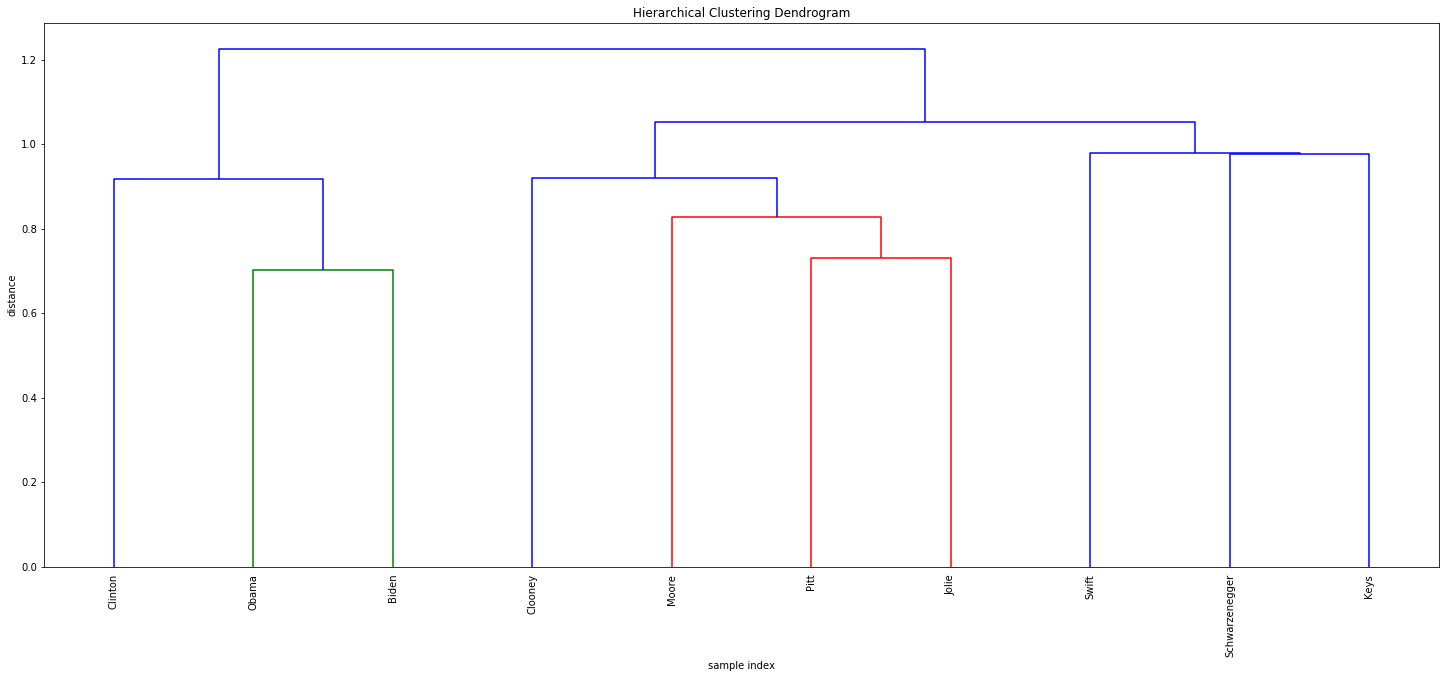

In [30]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels=names, #add the names of the samples
)
plt.show()

In case you're wondering about where the colors come from, you might want to have a look at the color_threshold argument of dendrogram(), which as not specified in our code, automagically picked a distance cut-off value of 0.7 of the final merge and then colored the first clusters below that threshold in individual colors.

In [36]:
# add the color_treshold=0.7 argument in the dendogram function. Then change the cut-off value of colors to 
# get clusters that make sense